In [38]:
import pandas as pd
# Load the cleaned healthcare dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['Date of Admission', 'Discharge Date', 'Name', 'Test Results_0', 'Test Results_1', 'Test Results_2'], errors='ignore')
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Fixed comma issue

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize, train, and predict with Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Results for Logistic Regression
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("First 10 Predictions:", y_pred_logistic[:10])

c:\Users\bharg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results
Accuracy: 0.9008823529411765
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.30      0.11      0.16       887
Inconclusive       0.90      0.97      0.94      7566
      Normal       1.00      1.00      1.00      1747

    accuracy                           0.90     10200
   macro avg       0.74      0.69      0.70     10200
weighted avg       0.87      0.90      0.88     10200

First 10 Predictions: ['Inconclusive' 'Inconclusive' 'Inconclusive' 'Inconclusive'
 'Inconclusive' 'Inconclusive' 'Inconclusive' 'Inconclusive'
 'Inconclusive' 'Inconclusive']


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00       887
Inconclusive       1.00      1.00      1.00      7566
      Normal       1.00      1.00      1.00      1747

    accuracy                           1.00     10200
   macro avg       1.00      1.00      1.00     10200
weighted avg       1.00      1.00      1.00     10200



In [5]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00       887
Inconclusive       1.00      1.00      1.00      7566
      Normal       1.00      1.00      1.00      1747

    accuracy                           1.00     10200
   macro avg       1.00      1.00      1.00     10200
weighted avg       1.00      1.00      1.00     10200



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00       887
Inconclusive       1.00      1.00      1.00      7566
      Normal       1.00      1.00      1.00      1747

    accuracy                           1.00     10200
   macro avg       1.00      1.00      1.00     10200
weighted avg       1.00      1.00      1.00     10200



In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model (using k=5 as a common choice)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors (KNN) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results
Accuracy: 0.8426470588235294
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.53      0.32      0.40       887
Inconclusive       0.86      0.94      0.90      7566
      Normal       0.86      0.67      0.76      1747

    accuracy                           0.84     10200
   macro avg       0.75      0.65      0.69     10200
weighted avg       0.83      0.84      0.83     10200



In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train SVM model with class weights and a different kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine (SVM) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Results
Accuracy: 0.9530392156862745
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.77      1.00      0.87       887
Inconclusive       1.00      0.94      0.97      7566
      Normal       0.89      1.00      0.94      1747

    accuracy                           0.95     10200
   macro avg       0.89      0.98      0.93     10200
weighted avg       0.96      0.95      0.95     10200



c:\Users\bharg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


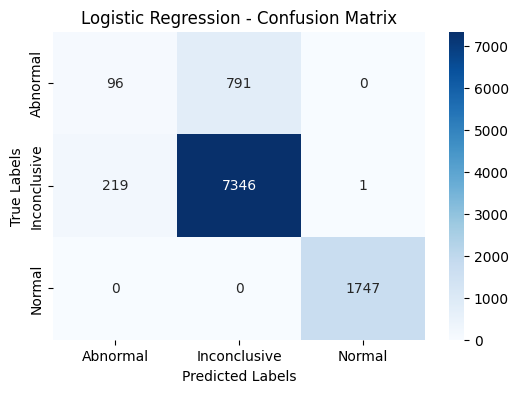

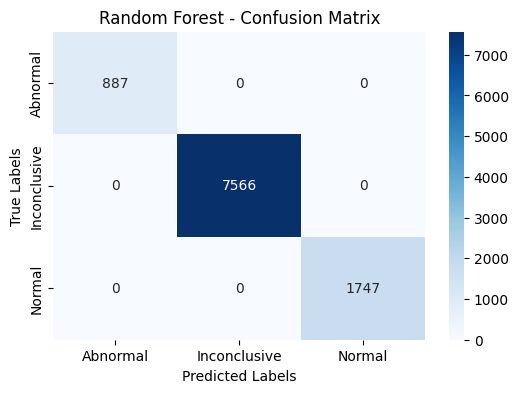

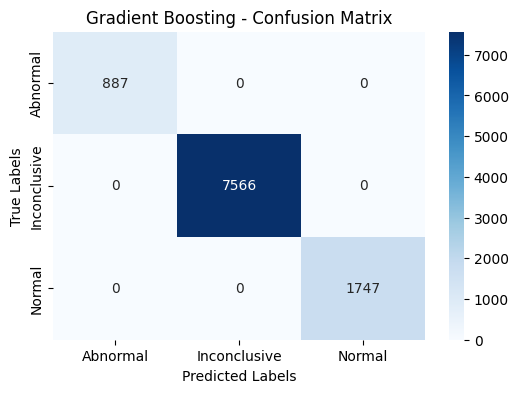

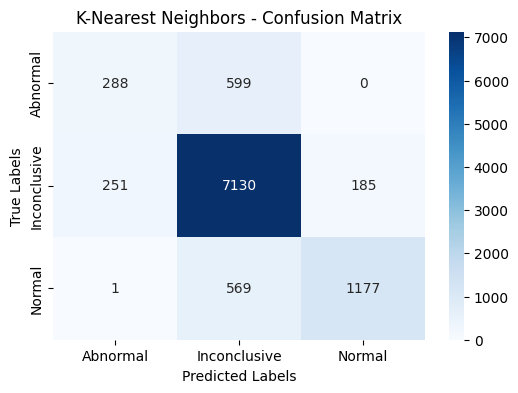

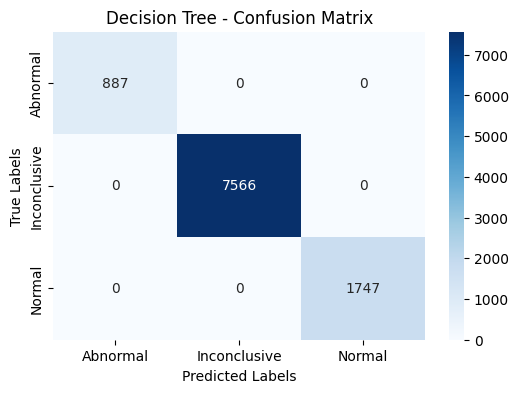

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

# Define features (X) and target (y)
# Assuming 'Test Results_0', 'Test Results_1', and 'Test Results_2' are target classes with one-hot encoding
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 'Name', 'Date of Admission', 'Discharge Date'])
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)  # Convert one-hot encoding to class labels
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42,class_weight='balanced')
}

# Train each model and plot the confusion matrix
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
